
# Car Price Prediction Using Regression Models

## 1. Introduction
A Chinese automobile company wants to enter the US market and needs insights into car pricing dynamics. This project aims to build regression models to predict car prices and identify key influencing factors.

## 2. Load and Explore the Dataset


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [52]:
# Load the dataset
data_url = "https://drive.google.com/uc?id=1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP"
df = pd.read_csv(data_url)
# Display first few rows
display(df.head())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0



## 3. Data Preprocessing
- Handle missing values
- Convert categorical variables
- Scale numerical features


In [54]:
# Handle missing values
df = df.dropna()

In [55]:
# Convert categorical variables if any
df = pd.get_dummies(df, drop_first=True)

In [56]:
# Splitting the data
X = df.drop(columns=['price'])  # Assuming 'price' is the target variable
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Model Implementation
Implementing the following regression models:
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor
4. Gradient Boosting Regressor
5. Support Vector Regressor

In [59]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return r2, mse, mae

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()
}

results = {}
for name, model in models.items():
    r2, mse, mae = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    results[name] = {"R2 Score": r2, "MSE": mse, "MAE": mae}


In [60]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                                 R2 Score           MSE           MAE
Linear Regression           -3.408864e+25  2.691094e+33  3.217533e+16
Decision Tree Regressor      8.731393e-01  1.001489e+07  1.988358e+03
Random Forest Regressor      9.528591e-01  3.721490e+06  1.342611e+03
Gradient Boosting Regressor  9.334560e-01  5.253254e+06  1.626832e+03
Support Vector Regressor    -1.017173e-01  8.697400e+07  5.705061e+03


## 5. Feature Importance Analysis
Identifying the most significant variables affecting car prices.

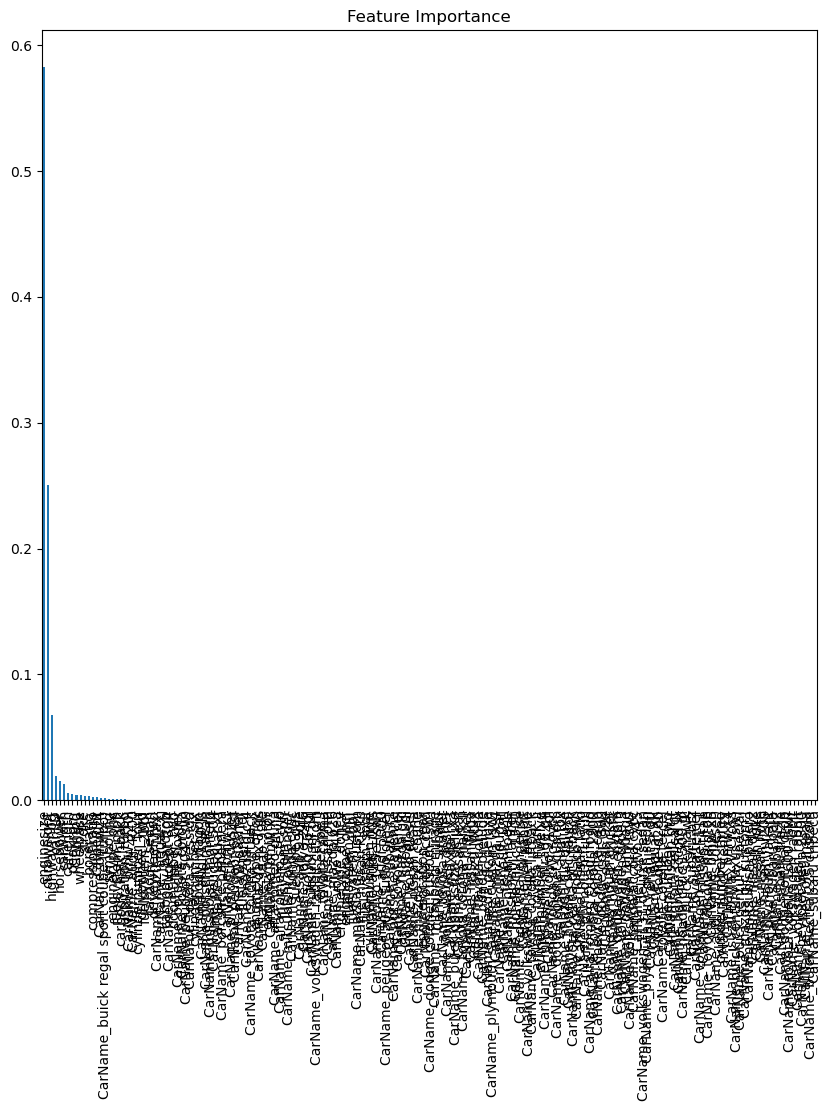

In [62]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 10))
plt.title("Feature Importance")
plt.show()

## 6. Hyperparameter Tuning
Optimizing the best-performing model using GridSearchCV.

In [64]:
param_grid = {"n_estimators": [100, 200], "max_depth": [10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'n_estimators': 100}


## 7. Conclusion
- Identified key factors influencing car prices.
- Compared multiple regression models.
- Optimized the best-performing model for better accuracy.
